In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, SeparableConv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, Add, Activation, GlobalAveragePooling1D

In [2]:
# Define input-output file names
datasets = {
    "B": {"input": "./Training_data/input_cathepsin_B.csv", "output": "./Training_data/output_cathepsin_B.csv"},
    "S": {"input": "./Training_data/input_cathepsin_S.csv", "output": "./Training_data/output_cathepsin_S.csv"},
    "D": {"input": "./Training_data/input_cathepsin_D.csv", "output": "./Training_data/output_cathepsin_D.csv"},
    "K": {"input": "./Training_data/input_cathepsin_K.csv", "output": "./Training_data/output_cathepsin_K.csv"},
}

In [3]:
# Function to preprocess data
def preprocess_data(input_path, output_path):
    # Load input and output data
    input_data = pd.read_csv(input_path, header=None, skiprows=1)
    output_data = pd.read_csv(output_path, header=None, skiprows=1)

    # Normalize input data
    scaler = MinMaxScaler()
    input_data_normalized = scaler.fit_transform(input_data)

    # Handle NaN values
    imputer = SimpleImputer(strategy='mean')
    input_data_imputed = imputer.fit_transform(input_data_normalized)

    # One-hot encode output data
    output_labels = output_data[0].values
    output_data_encoded = pd.get_dummies(output_labels, dtype=np.float32).values

    # Reshape input data for CNN
    input_data_reshaped = input_data_imputed.reshape((input_data_imputed.shape[0], input_data_imputed.shape[1], 1))

    return input_data_reshaped, output_data_encoded

# Function to build the model
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Processing dataset B...
Training model for dataset B...
Epoch 1/150


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5965 - loss: 0.9312 - val_accuracy: 0.7376 - val_loss: 0.5989
Epoch 2/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7737 - loss: 0.5389 - val_accuracy: 0.8241 - val_loss: 0.4641
Epoch 3/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8154 - loss: 0.4592 - val_accuracy: 0.8522 - val_loss: 0.4164
Epoch 4/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8487 - loss: 0.3823 - val_accuracy: 0.8580 - val_loss: 0.3788
Epoch 5/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8576 - loss: 0.3543 - val_accuracy: 0.8688 - val_loss: 0.3401
Epoch 6/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8770 - loss: 0.3189 - val_accuracy: 0.8688 - val_loss: 0.3663
Epoch 7/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8875 - loss: 0.2881 - val_accuracy: 0.8933 - val_loss: 0.2836
Epoch 8/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8991 - loss: 0.2589 - val_accuracy: 0.8976

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       354
           1       0.97      0.95      0.96       355
           2       0.96      0.98      0.97       337
           3       0.98      1.00      0.99       341

    accuracy                           0.97      1387
   macro avg       0.97      0.97      0.97      1387
weighted avg       0.97      0.97      0.97      1387



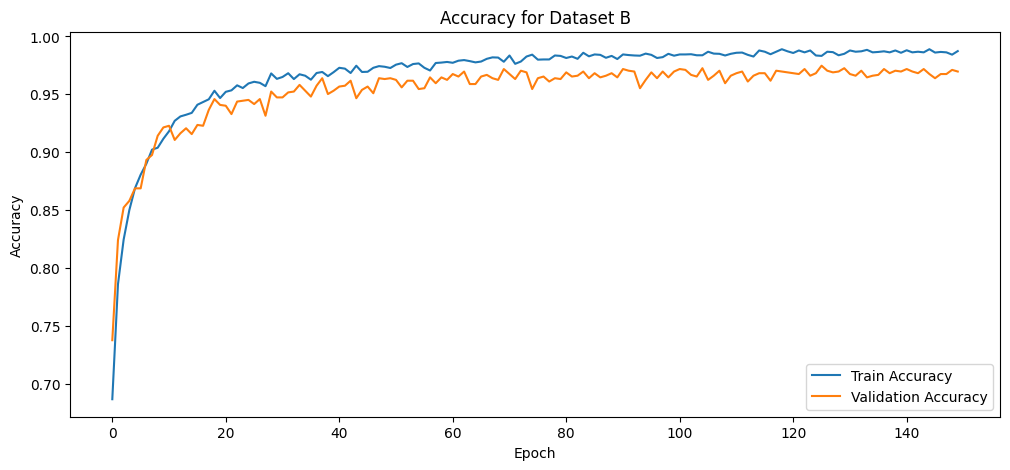

Processing dataset S...
Training model for dataset S...
Epoch 1/150


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5257 - loss: 1.1140 - val_accuracy: 0.6410 - val_loss: 0.8475
Epoch 2/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6556 - loss: 0.8326 - val_accuracy: 0.6635 - val_loss: 0.7873
Epoch 3/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6964 - loss: 0.7411 - val_accuracy: 0.6859 - val_loss: 0.7299
Epoch 4/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7194 - loss: 0.6842 - val_accuracy: 0.7285 - val_loss: 0.6696
Epoch 5/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7488 - loss: 0.6224 - val_accuracy: 0.7285 - val_loss: 0.6569
Epoch 6/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7652 - loss: 0.5967 - val_accuracy: 0.7365 - val_loss: 0.6274
Epoch 7/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7801 - loss: 0.5572 - val_accuracy: 0.7454 - val_loss: 0.6152
Epoch 8/150
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7993 - loss: 0.5142 - val_accuracy: 0.7614

Classification Report for dataset S:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       304
           1       0.80      0.87      0.84       304
           2       0.90      0.79      0.84       325
           3       0.94      0.99      0.97       312

    accuracy                           0.88      1245
   macro avg       0.88      0.88      0.88      1245
weighted avg       0.88      0.88      0.88      1245



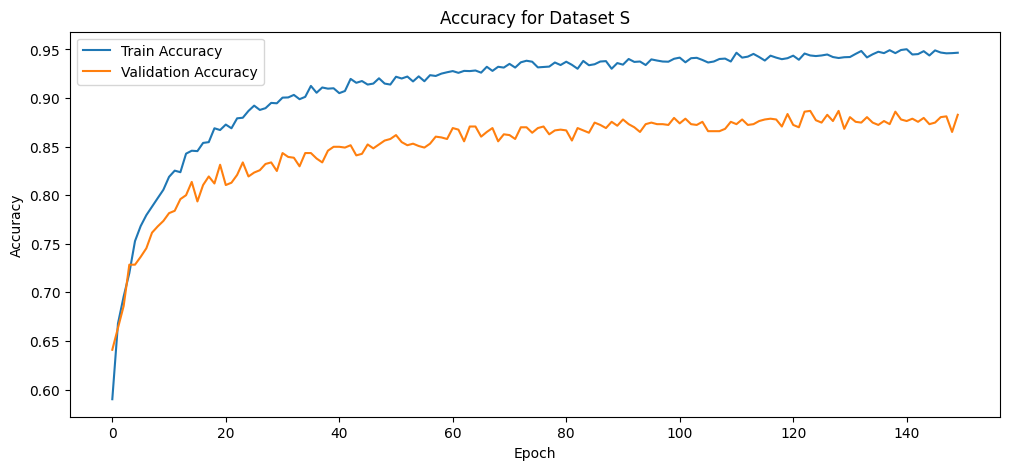

Processing dataset D...
Training model for dataset D...
Epoch 1/150


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6311 - loss: 0.8510 - val_accuracy: 0.7952 - val_loss: 0.5071
Epoch 2/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7896 - loss: 0.4922 - val_accuracy: 0.8167 - val_loss: 0.4222
Epoch 3/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8296 - loss: 0.4065 - val_accuracy: 0.8585 - val_loss: 0.3476
Epoch 4/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8510 - loss: 0.3761 - val_accuracy: 0.8779 - val_loss: 0.3290
Epoch 5/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8601 - loss: 0.3457 - val_accuracy: 0.8829 - val_loss: 0.2924
Epoch 6/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8822 - loss: 0.3087 - val_accuracy: 0.8912 - val_loss: 0.2830
Epoch 7/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8787 - loss: 0.3016 - val_accuracy: 0.8995 - val_loss: 0.2790
Epoch 8/150
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8980 - loss: 0.2697 - val_accuracy: 0.9098

Classification Report for dataset D:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       621
           1       0.92      0.97      0.95       587
           2       0.97      0.98      0.97       626
           3       0.99      1.00      1.00       583

    accuracy                           0.97      2417
   macro avg       0.97      0.97      0.97      2417
weighted avg       0.97      0.97      0.97      2417



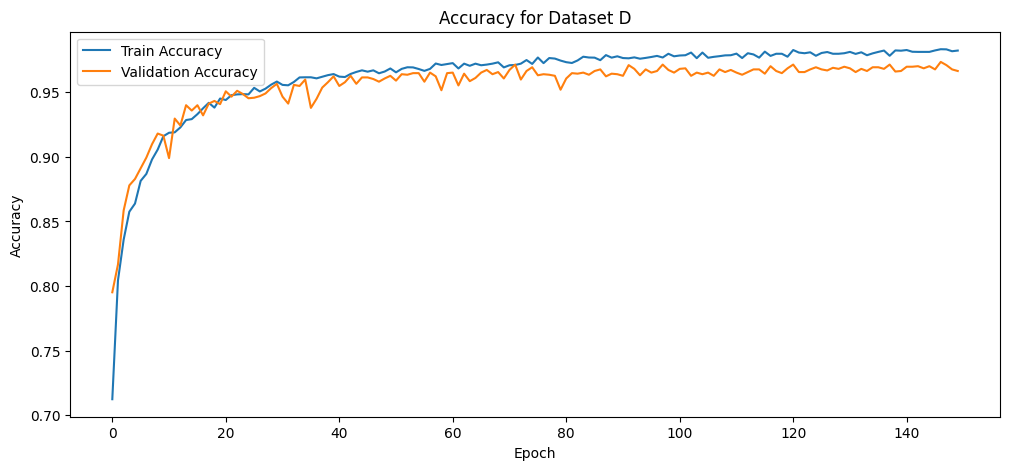

Processing dataset K...


c:\Users\Moham\OneDrive\Desktop\Anti-Cathepsin Prediction\ALLCAT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model for dataset K...
Epoch 1/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3691 - loss: 1.3125 - val_accuracy: 0.5764 - val_loss: 0.9922
Epoch 2/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6135 - loss: 0.9315 - val_accuracy: 0.6454 - val_loss: 0.8415
Epoch 3/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6829 - loss: 0.7814 - val_accuracy: 0.6913 - val_loss: 0.7673
Epoch 4/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6917 - loss: 0.7590 - val_accuracy: 0.7063 - val_loss: 0.7232
Epoch 5/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7377 - loss: 0.6658 - val_accuracy: 0.7283 - val_loss: 0.6949
Epoch 6/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7541 - loss: 0.6453 - val_accuracy: 0.7223 - val_loss: 0.7151
Epoch 7/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7715 - loss: 0.6016 - val_accuracy: 0.7742 - val_loss: 0.5855
Epoch 8/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 

Classification Report for dataset K:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       246
           1       0.86      0.94      0.90       253
           2       0.96      0.81      0.88       265
           3       0.93      1.00      0.96       237

    accuracy                           0.92      1001
   macro avg       0.93      0.93      0.92      1001
weighted avg       0.93      0.92      0.92      1001



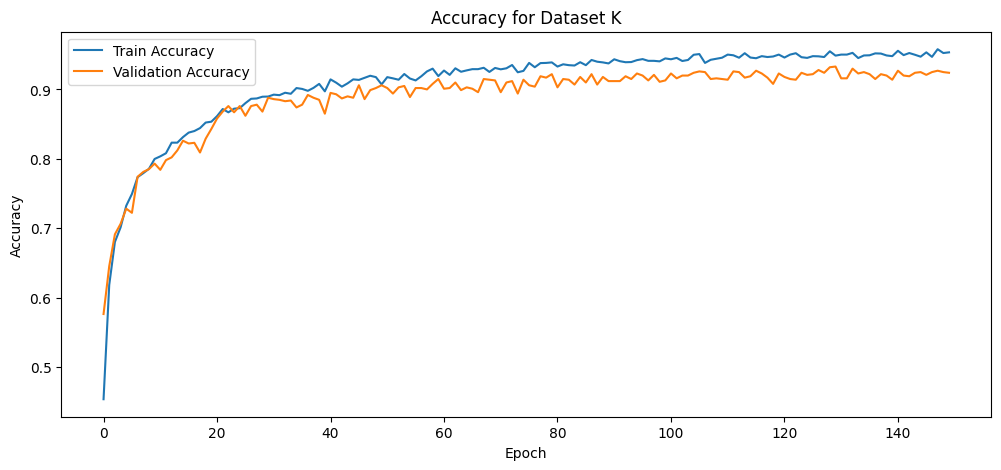

In [4]:
# Process each dataset
for key, paths in datasets.items():
    print(f"Processing dataset {key}...")

    # Preprocess the data
    input_data, output_data = preprocess_data(paths['input'], paths['output'])

    # Apply SMOTE to balance classes
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(
        input_data.reshape(input_data.shape[0], -1), output_data
    )
    X_resampled = X_resampled.reshape((X_resampled.shape[0], input_data.shape[1], 1))

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )


    # Build the model
    model = build_model(X_train.shape[1:], num_classes=output_data.shape[1])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    print(f"Training model for dataset {key}...")
    history = model.fit(
        X_train, y_train, 
        epochs=150, 
        batch_size=32, 
        validation_data=(X_test, y_test), 
        # callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test accuracy for dataset {key}: {test_acc}")

    # Predict and generate classification report
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(f"Classification Report for dataset {key}:")
    print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))
    # Save the trained model
    model.save(f'./Saved_Models/model_{key}.h5')
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy for Dataset {key}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()